In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import  datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 决策树回归

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
def creat_data(n):
    X = 5 * np.random.rand(n, 1)
    y = np.sin(X).ravel()
    noise_num=(int)(n/5)
    y[::5] += 3 * (0.5 - np.random.rand(noise_num)) # 每第5个样本，就在该样本的值上添加噪音
    return train_test_split(X, y,test_size=0.25)

In [4]:
def test_DecisionTreeRegressor_depth(*data, maxdepth):
    
    X_train,X_test,y_train,y_test = data
    depths=np.arange(1,maxdepth)
    training_scores=[]; testing_scores=[]
    
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train, y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
        
    regr = DecisionTreeRegressor(max_depth=3)
    regr.fit(X_train, y_train)

    ## 绘图
    plt.figure(figsize=(12, 4))
    ax = plt.subplot(121)
    ax.plot(depths,training_scores,label="traing score")
    ax.plot(depths,testing_scores,label="testing score")
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)

    ax = plt.subplot(122)
    X = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    Y = regr.predict(X)
    ax.scatter(X_train, y_train, label="train sample",c='g')
    ax.scatter(X_test, y_test, label="test sample",c='r')
    ax.plot(X, Y, label="predict_value", linewidth=2,alpha=0.5)
    ax.set_xlabel("data")
    ax.set_ylabel("target")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()

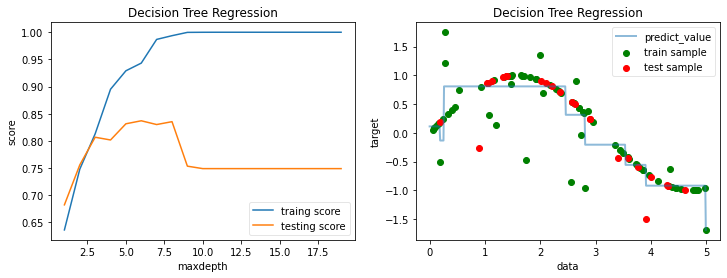

In [5]:
X_train,X_test,y_train,y_test=creat_data(100)
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=20)

## 决策树分类

In [6]:
def load_data():
    iris=datasets.load_iris()
    X_train=iris.data
    y_train=iris.target
    
    # stratify：分层采样
    return train_test_split(X_train, y_train,test_size=0.25, stratify=y_train)

In [7]:
def test_DecisionTreeClassifier_depth(*data):
    
    X_train,X_test,y_train,y_test = data
    depths=np.arange(1,10)
    training_scores=[]; testing_scores=[]
    
    for depth in depths:
        # criterions=['gini','entropy']
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
        
    clf = DecisionTreeClassifier(max_depth=2)
    clf.fit(X_train, y_train)

    ## 绘图
    plt.figure(figsize=(12, 4))
    ax = plt.subplot(121)
    ax.plot(depths,training_scores,label="traing score",marker='o')
    ax.plot(depths,testing_scores,label="testing score",marker='*')
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Classification")
    ax.legend(framealpha=0.5,loc='best')
    plt.show()

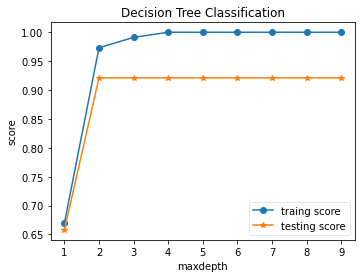

In [8]:
X_train,X_test,y_train,y_test=load_data()
test_DecisionTreeClassifier_depth(X_train,X_test,y_train,y_test)